# TIME SERIES ANALYSIS FOR BITCOIN PRICE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [1]:
df = pd.read_csv("C:\\/Users/hp/downloads/ArchaeoByte_Tasks/BTC-USD.csv", parse_dates=[0], index_col=0)

<IPython.core.display.Javascript object>

In [2]:
df.sort_index(axis=0, inplace=True)

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-01,37713.265625,38627.859375,37585.789063,38469.093750,38469.093750,27002760110
2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244


In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381435,16615.381435,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040039,11388.611572,10722.320557,11056.325195,11056.325195,2.558002e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [18]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [19]:
np.sum(df['Close'] - df['Adj Close'])

0.0

# ***Preprocessing***

In [20]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [21]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2788 entries, 2014-09-17 to 2022-05-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2788 non-null   float64
 1   High       2788 non-null   float64
 2   Low        2788 non-null   float64
 3   Close      2788 non-null   float64
 4   Adj Close  2788 non-null   float64
 5   Volume     2788 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 152.5 KB


In [24]:
df.nunique()

Open         2784
High         2785
Low          2787
Close        2785
Adj Close    2785
Volume       2788
dtype: int64

# ***Resampling Data***

In [25]:
monthly_df = df['Open'].resample('MS').mean()

In [26]:
monthly_df

Date
2014-09-01      412.654003
2014-10-01      365.748000
2014-11-01      364.850235
2014-12-01      343.074836
2015-01-01      251.799905
                  ...     
2022-01-01    41368.073463
2022-02-01    40591.103934
2022-03-01    41889.148438
2022-04-01    41694.653646
2022-05-01    38437.792188
Freq: MS, Name: Open, Length: 93, dtype: float64

# ***Data Visualization***

In [27]:
df_adj = df['Adj Close']

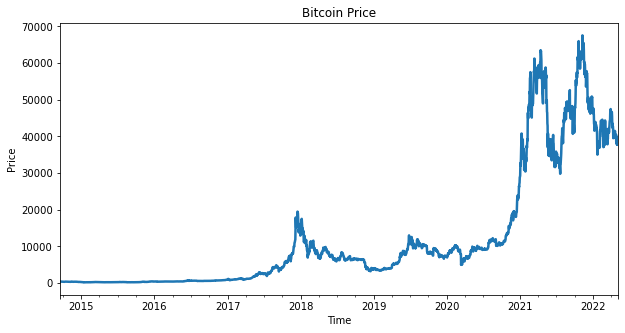

In [28]:
df_adj.plot(lw=2.5, figsize=(10, 5))
plt.title('Bitcoin Price')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()

Text(0.5, 1.0, 'Open,High,Low vs Price')

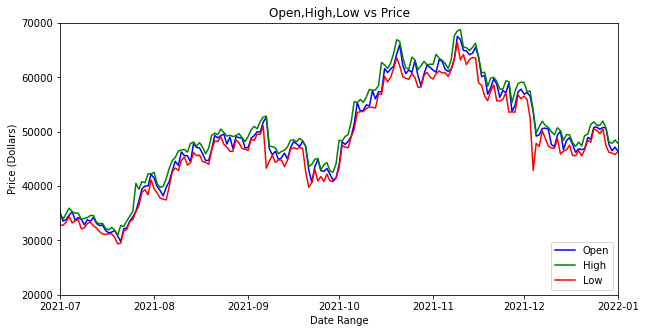

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.ylim(20000,70000)
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")
plt.title('Open,High,Low vs Price')

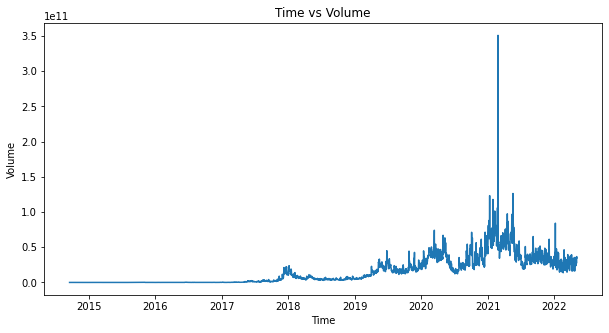

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df['Volume'])
plt.title('Time vs Volume')
plt.ylabel('Volume');
plt.xlabel('Time');

<AxesSubplot:xlabel='Date'>

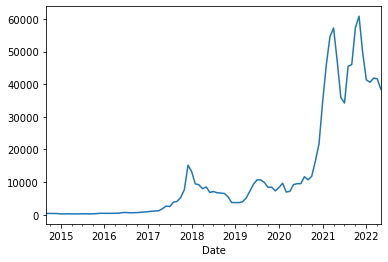

In [31]:
# Monthly Data plotting
monthly_df.plot()

Text(0, 0.5, 'Open cost')

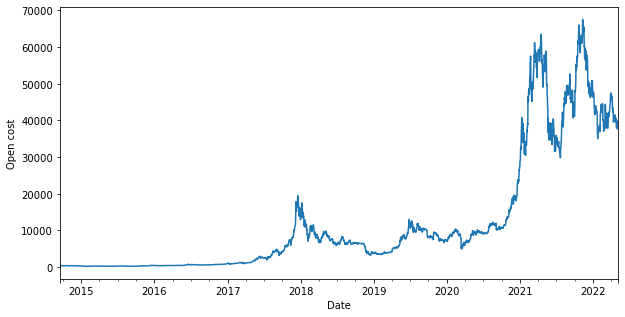

In [32]:
plt.figure(figsize=(10, 5))
df['Open'].plot()
plt.ylabel('Open cost')

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

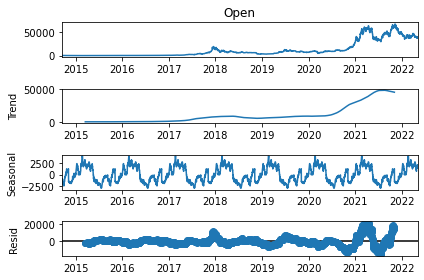

In [34]:
decomposition = seasonal_decompose(df['Open'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

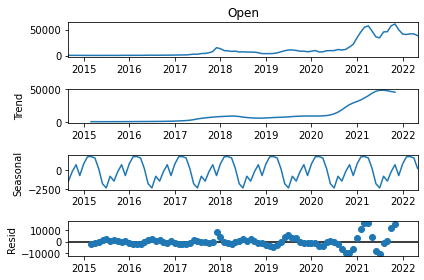

In [35]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

# ***To check if data is stationary***

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [38]:
adfuller_test(df['Open'])

ADF Test Statistic : -1.1354381224528844
p-value : 0.7007347447097791
#Lags Used : 28
Number of observations Used : 2759
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [39]:
adfuller_test(monthly_df)

ADF Test Statistic : -2.2482787716085126
p-value : 0.1891916971226601
#Lags Used : 11
Number of observations Used : 81
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


# ***Making Stationary***

In [40]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[2, 6.399928956497079e-15],
 [1, 1.2542198869949511e-14],
 [29, 1.3887279977627034e-14],
 [15, 6.995891615805857e-14],
 [3, 1.2724614235966995e-13],
 [10, 1.422128778461742e-13],
 [4, 1.9623028098239346e-13],
 [11, 3.481338112495439e-13],
 [30, 7.033391528355711e-13],
 [8, 7.796131357706926e-13]]

In [41]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)

In [42]:
rate_diff

Date
2014-10-14     -74.172028
2014-10-15     -55.904998
2014-10-16     -29.584992
2014-10-17     -11.916992
2014-10-18     -24.108978
                 ...     
2022-05-01   -8732.007813
2022-05-02   -8152.320313
2022-05-03   -7016.246094
2022-05-04   -5459.488281
2022-05-05   -3777.750000
Name: Open, Length: 2761, dtype: float64

In [43]:
adfuller_test(rate_diff)

ADF Test Statistic : -5.192107481301573
p-value : 9.12421264114622e-06
#Lags Used : 27
Number of observations Used : 2733
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

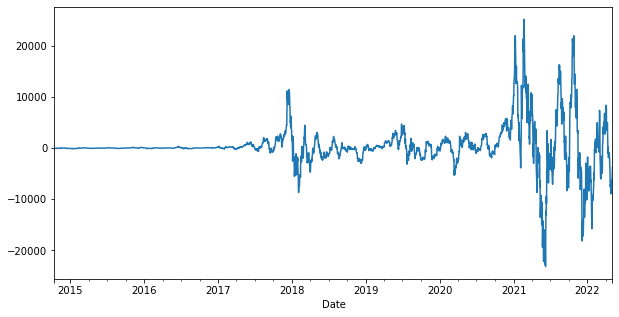

In [44]:
plt.figure(figsize=(10, 5))
rate_diff.plot()

In [45]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[1, 2.860672553808415e-08],
 [5, 0.004154577707409995],
 [6, 0.004401589492759545],
 [4, 0.012751690279806332],
 [8, 0.03428307570375423],
 [7, 0.03773768448406992],
 [2, 0.04332935389989229],
 [3, 0.07384288060620266],
 [9, 0.1730428640351856],
 [11, 0.20714683993454375],
 [10, 0.25259562273347747]]

In [46]:
seasonal_monthly_df = monthly_df.diff(periods=9)

In [47]:
seasonal_monthly_df

Date
2014-09-01             NaN
2014-10-01             NaN
2014-11-01             NaN
2014-12-01             NaN
2015-01-01             NaN
                  ...     
2022-01-01   -15883.182787
2022-02-01    -6514.724569
2022-03-01     5968.601498
2022-04-01     7460.441196
2022-05-01    -7078.327646
Freq: MS, Name: Open, Length: 93, dtype: float64

In [48]:
adfuller_test(seasonal_monthly_df.dropna())

ADF Test Statistic : -2.296674162631453
p-value : 0.1730428640351856
#Lags Used : 10
Number of observations Used : 73
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


<AxesSubplot:xlabel='Date'>

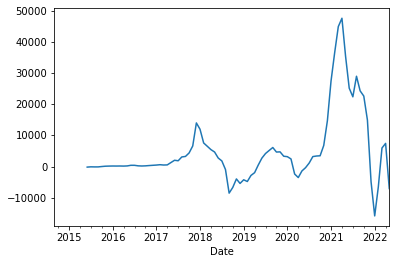

In [49]:
seasonal_monthly_df.plot()

# ***Visulizing PACF and ACF Plots***

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


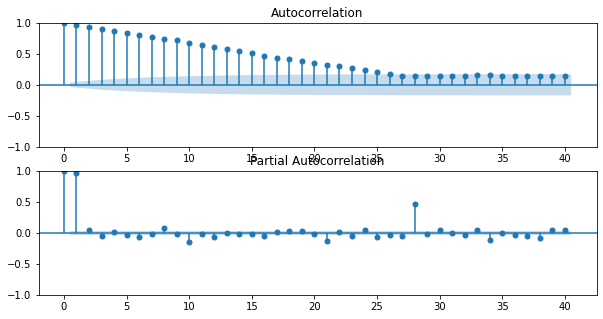

In [51]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


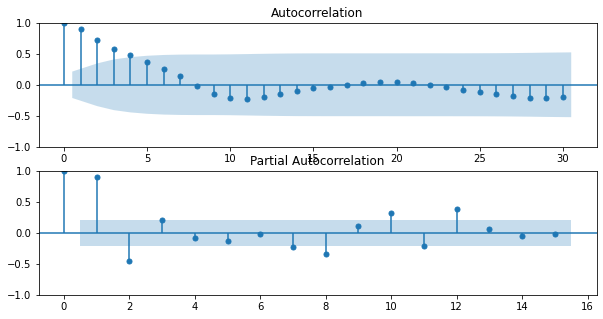

In [52]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
#Here lags are basically the number of time  periods we skip to observe correlation in our data.
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=15, ax=ax2)

# ***Modeling***

In [53]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 2788
93% of data will be: 2592.84


In [54]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [55]:
test_x

Date
2021-10-22    62237.890625
2021-10-23    60694.628906
2021-10-24    61368.343750
2021-10-25    60893.925781
2021-10-26    63032.761719
                  ...     
2022-05-01    37713.265625
2022-05-02    38472.187500
2022-05-03    38528.109375
2022-05-04    37748.011719
2022-05-05    39727.386719
Name: Open, Length: 196, dtype: float64

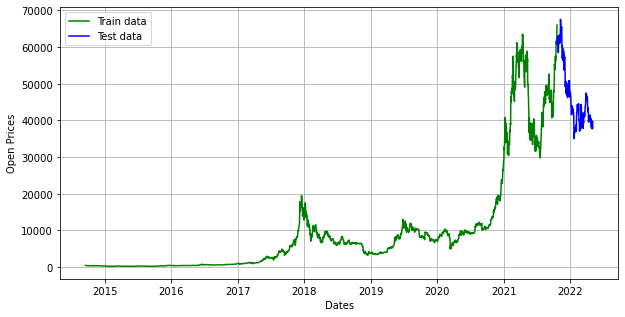

In [56]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

# ***ARIMA Model***

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [58]:
model_arima = ARIMA(train_x, order=(4, 1, 0))
model_arima_fit = model_arima.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [59]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [60]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,predicted_mean
Date,
2021-10-22,66084.527254
2021-10-23,66259.009629
2021-10-24,66424.496436
2021-10-25,66518.911839
2021-10-26,66532.336951
...,...
2022-05-01,66572.341927
2022-05-02,66572.341927
2022-05-03,66572.341927


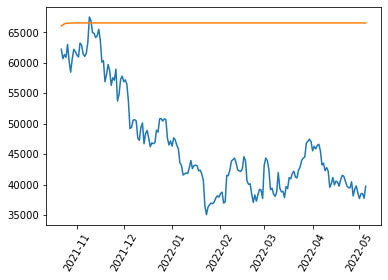

In [61]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

In [62]:
monthly_df

Date
2014-09-01      412.654003
2014-10-01      365.748000
2014-11-01      364.850235
2014-12-01      343.074836
2015-01-01      251.799905
                  ...     
2022-01-01    41368.073463
2022-02-01    40591.103934
2022-03-01    41889.148438
2022-04-01    41694.653646
2022-05-01    38437.792188
Freq: MS, Name: Open, Length: 93, dtype: float64

In [63]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

83.7

In [64]:
monthly_df.index[64]

Timestamp('2020-01-01 00:00:00', freq='MS')

In [65]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [66]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0) )
model_arima_fit = model_arima.fit()

In [67]:
train_monthly.describe()

count       83.000000
mean      8201.361882
std      12184.439302
min        232.821856
25%        520.238257
50%       5136.813314
75%       9400.861621
max      57251.256250
Name: Open, dtype: float64

In [68]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [69]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,predicted_mean
Date,
2021-08-01,374.747284
2021-09-01,362.835232
2021-10-01,351.901535
2021-11-01,343.839229
2021-12-01,349.161909
2022-01-01,351.888473
2022-02-01,346.841209
2022-03-01,351.253958
2022-04-01,346.081848


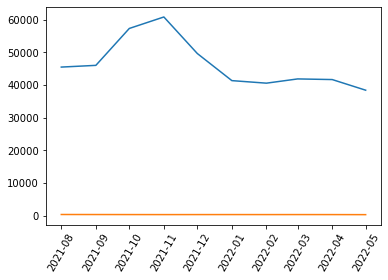

In [71]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

# ***ARIMA Model with updating train with current data***

In [72]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
training_data = list(train_x)
testing_data = list(test_x)

In [74]:
model_predictions = []
n_test_obser = len(testing_data)

In [75]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [76]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2787
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22562.003
Date:                Mon, 02 Oct 2023   AIC                          45134.006
Time:                        11:31:36   BIC                          45163.668
Sample:                             0   HQIC                         45144.716
                               - 2787                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0317      0.010     -3.306      0.001      -0.051      -0.013
ar.L2         -0.0078      0.009     -0.842      0.400      -0.026       0.010
ar.L3          0.0147      0.010      1.474      0.1

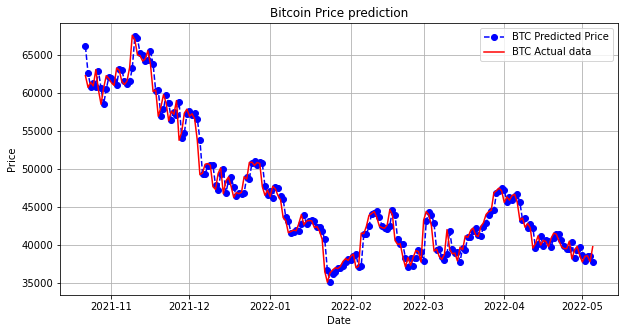

In [77]:
plt.figure(figsize=(10, 5))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="BTC Predicted Price")
plt.plot(date_range, testing_data, color='red', label='BTC Actual data')

plt.title('Bitcoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [78]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.024009324727949782


In [79]:
mean_squared_error(testing_data, model_predictions)

2377040.920618699

In [80]:
np.mean(testing_data)

46621.56499138776

# ***Accuracy of ARIMA Model***

In [81]:
accuracy = 1-mape
print("Accuracy of Model is",accuracy)

Accuracy of Model is 0.9759906752720502


# ***SARIMA Model***

In [82]:
import statsmodels.api as sm

In [83]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


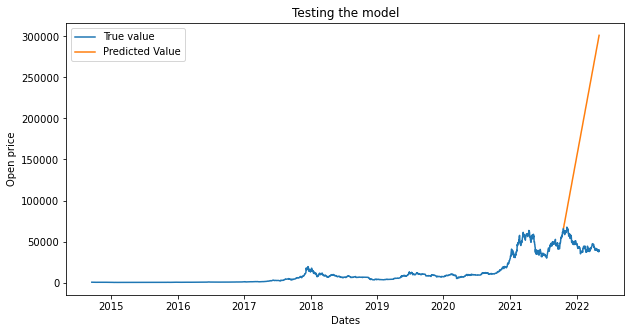

In [84]:
plt.figure(figsize=(10, 5))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
daily_prediction

2021-10-22     67066.103598
2021-10-23     68060.423430
2021-10-24     68817.101976
2021-10-25     70852.377101
2021-10-26     71626.000945
                  ...      
2022-05-01    296234.686114
2022-05-02    297674.615359
2022-05-03    298780.881827
2022-05-04    299840.470756
2022-05-05    301280.400002
Freq: D, Name: predicted_mean, Length: 196, dtype: float64

In [87]:
X[train_limit:]

Date
2021-10-22    62237.890625
2021-10-23    60694.628906
2021-10-24    61368.343750
2021-10-25    60893.925781
2021-10-26    63032.761719
                  ...     
2022-05-01    37713.265625
2022-05-02    38472.187500
2022-05-03    38528.109375
2022-05-04    37748.011719
2022-05-05    39727.386719
Name: Open, Length: 196, dtype: float64

In [88]:
print("Mean of target value:", X[train_limit:].mean())
print("Mean Absolute error:", mean_absolute_error(X[train_limit:], daily_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(X[train_limit:], daily_prediction)))

Mean of target value: 46621.564991387735
Mean Absolute error: 137360.831331413
Root mean squared error: 156449.44960034292


In [89]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


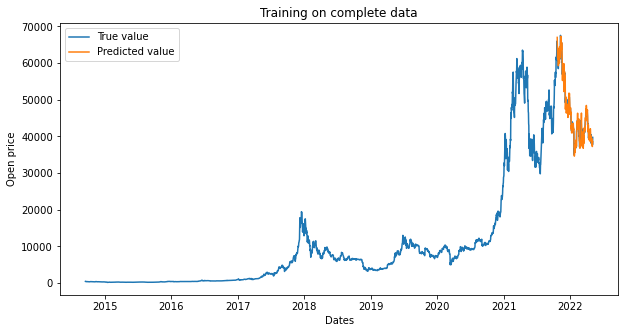

In [90]:
plt.figure(figsize=(10, 5))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [91]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 93
90% of data will be: 83.7


In [92]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [93]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

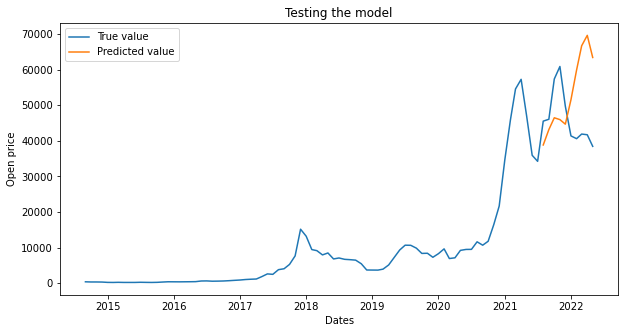

In [94]:
plt.figure(figsize=(10, 5))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [95]:
test_x_monthly

Date
2021-08-01    45516.119834
2021-09-01    46041.859375
2021-10-01    57344.743952
2021-11-01    60857.520313
2021-12-01    49670.411794
2022-01-01    41368.073463
2022-02-01    40591.103934
2022-03-01    41889.148438
2022-04-01    41694.653646
2022-05-01    38437.792188
Freq: MS, Name: Open, dtype: float64

In [96]:
monthly_prediction

2021-08-01    38820.552957
2021-09-01    43141.893268
2021-10-01    46460.544329
2021-11-01    45941.671768
2021-12-01    44665.962047
2022-01-01    51528.013136
2022-02-01    59868.014306
2022-03-01    66664.946589
2022-04-01    69596.460764
2022-05-01    63384.510440
Freq: MS, Name: predicted_mean, dtype: float64

In [97]:
print("Mean of target value:", test_x_monthly.mean())
print("Mean Absolute error:", mean_absolute_error(test_x_monthly, monthly_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(test_x_monthly, monthly_prediction)))

Mean of target value: 46341.142693623086
Mean Absolute error: 14746.120446620067
Root mean squared error: 17055.048195289888


In [98]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

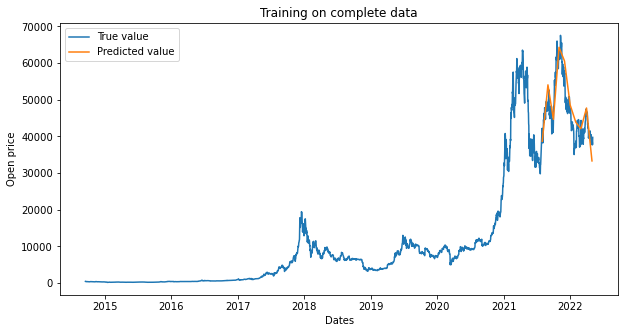

In [99]:
plt.figure(figsize=(10, 5))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

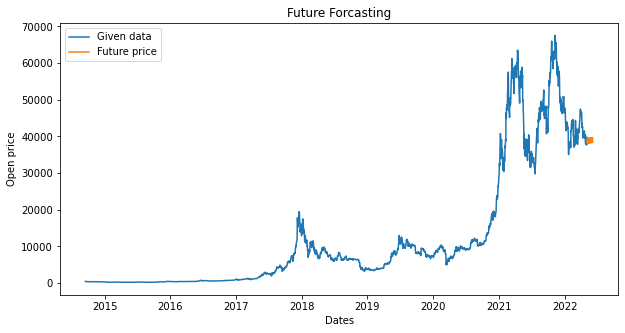

In [100]:
plt.figure(figsize=(10, 5))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

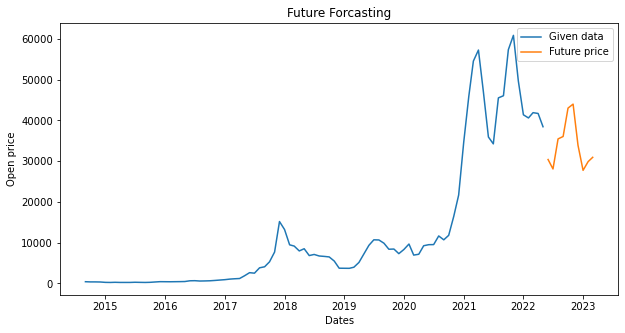

In [101]:
plt.figure(figsize=(10, 5))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

# ***Accuracy of SARIMA Model***

In [102]:
Mape = np.mean(np.abs(np.array(monthly_prediction) - np.array(test_x_monthly))/np.abs(test_x_monthly.mean()))
print("MAPE:", mape)

MAPE: 0.024009324727949782


In [103]:
Accuracy = 1 - Mape
print("Accuracy of SARIMA model is",Accuracy)

Accuracy of SARIMA model is 0.8624358708831708
